# LABORATORY SESSION - WEEK 05

### Exercise 1



### Solution

### Exercise 2

Implement a function that returns the adjacency matrix of one realization of the ER graph with given values of N and p. Watch out for the trap!

### Solution

In [3]:
import networkx as nx
import numpy as np

def create_er_adjacency_matrix(N, p):
    """
    Creates an ER graph and returns its adjacency matrix
    
    Parameters:
    N (int): Number of nodes
    p (float): Probability of edge creation between any two nodes (0 <= p <= 1)
    
    Returns:
    numpy.ndarray: NxN adjacency matrix
    """
    # Create an ER graph using NetworkX
    G = nx.erdos_renyi_graph(n=N, p=p)
    
    # Convert the graph to adjacency matrix
    adj_matrix = nx.adjacency_matrix(G).todense() # from sparse to dense representation
    
    return G, np.array(adj_matrix)

# Usage example
# This is the case of the ER graph with N nodes and p = 1/N
N = 1000
p = 1/N

G, adj_matrix = create_er_adjacency_matrix(N, p)
print(f"N = {N}, p = {p}")
print("ER graph adjacency matrix:")
print(adj_matrix)

N = 1000, p = 0.001
ER graph adjacency matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Exercise 3

Draw the resulting graph.

### Solution

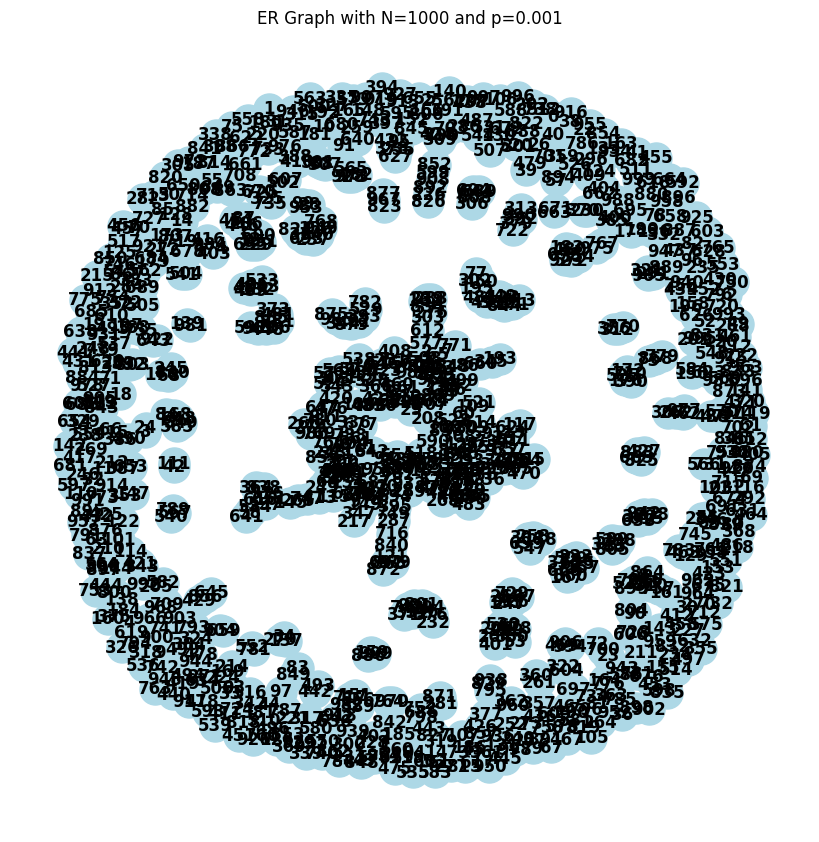

In [4]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(8, 8))

# Draw the graph
pos = nx.spring_layout(G)  # Calculate layout
nx.draw(G, pos, 
        with_labels=True,  # Show node labels
        node_color='lightblue',
        edge_color='gray',
        node_size=500,
        font_size=12,
        font_weight='bold')

plt.title(f'ER Graph with N={N} and p={p:.3f}')
plt.show()

### Exercise 4

Draw histograms of degree distribution.

### Solution

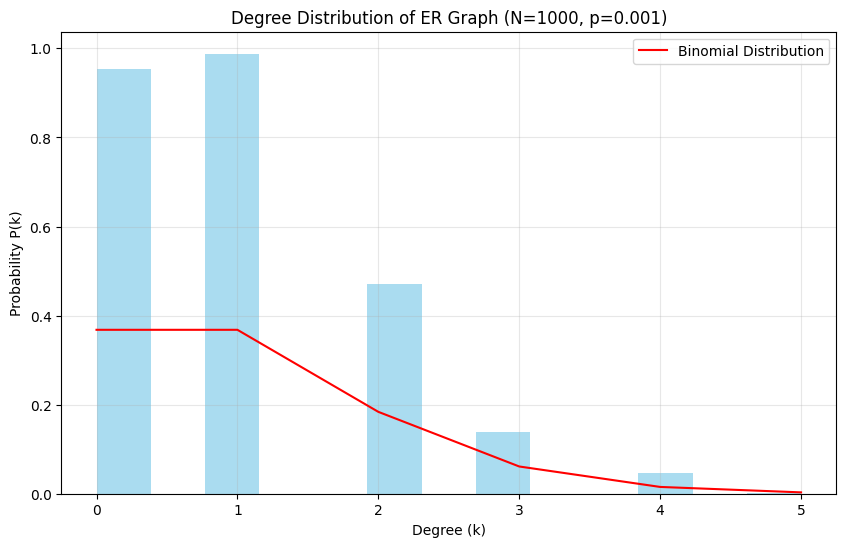

Average degree: 0.98
Maximum degree: 5
Minimum degree: 0


In [5]:
import scipy 

# Get the degree sequence of the graph
degrees = [d for n, d in G.degree()]

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins='auto', density=True, alpha=0.7, color='skyblue')
plt.xlabel('Degree (k)')
plt.ylabel('Probability P(k)')
plt.title(f'Degree Distribution of ER Graph (N={N}, p={p:.3f})')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add theoretical binomial distribution
k_values = np.arange(min(degrees), max(degrees) + 1)
n = N - 1  # number of possible connections for each node
binom_pmf = scipy.stats.binom.pmf(k_values, n, p)
plt.plot(k_values, binom_pmf, 'r-', label='Binomial Distribution')

plt.legend()
plt.show()

# Print some statistics
print(f"Average degree: {np.mean(degrees):.2f}")
print(f"Maximum degree: {max(degrees)}")
print(f"Minimum degree: {min(degrees)}")

### Exercise 5

What degree of vertex distribution do we expect?

### Solution

We expect a Binomial distribution of degrees, from a theoretical pooint of view. 


### Exercise 6

Explain the Poisson approximation of the vertex degree distribution.

### Solution

The degree of a node in an ER graph follows a binomial distribution with parameters N and p. As N tends to infinity and p tends to 0, the binomial distribution converges to a Poisson distribution with parameter λ = Np.

The mathematical justification for the Poisson approximation in ER graphs can be derived as follows:

1. In an ER graph G(N,p), for any vertex v, its degree k follows a binomial distribution:
   $$P(\text{deg}(v) = k) = \binom{N}{k} p^k (1-p)^{N-k}$$

2. As $N \to \infty$ and $p \to 0$ while keeping $\lambda = Np$ constant:
   
   $$\lim_{N \to \infty} P(\text{deg}(v) = k) = \lim_{N \to \infty} \left[\binom{N}{k} \left(\frac{\lambda}{N}\right)^k \left(1-\frac{\lambda}{N}\right)^{N-k}\right]$$
   
   $$= \lim_{N \to \infty} \frac{N!}{k!(N-k)!} \left(\frac{\lambda}{N}\right)^k \left(1-\frac{\lambda}{N}\right)^{N-k}$$
   
   $$= \lim_{N \to \infty} \frac{\lambda^k}{k!} \cdot \frac{N(N-1)\cdots(N-k+1)}{N^k} \cdot \left(1-\frac{\lambda}{N}\right)^{N-k}$$
   
   $$= \frac{\lambda^k}{k!} \cdot 1 \cdot e^{-\lambda}$$
   
   $$= \frac{e^{-\lambda} \lambda^k}{k!}$$

3. This final expression is exactly the probability mass function of a Poisson distribution with parameter λ.

Therefore, in the limit of large N and small p with λ = Np constant, the degree distribution of an ER graph converges to a Poisson distribution with mean λ.

This approximation is particularly good when:
- N is large (typically N > 100)
- p is small (typically p < 0.1)
- Np is constant and moderate in size

### Exercise 7 

Plot both the simulation results and analytically obtained distributions on one graph. Test appropriate hypotheses.

### Solution 


Chi-square test results:
Chi-square statistic: 2.0212
Degrees of freedom: 4
p-value: 0.7319

Interpretation:
H0: The degree distribution follows a Poisson distribution
H1: The degree distribution does not follow a Poisson distribution
Fail to reject H0 at 5% significance level


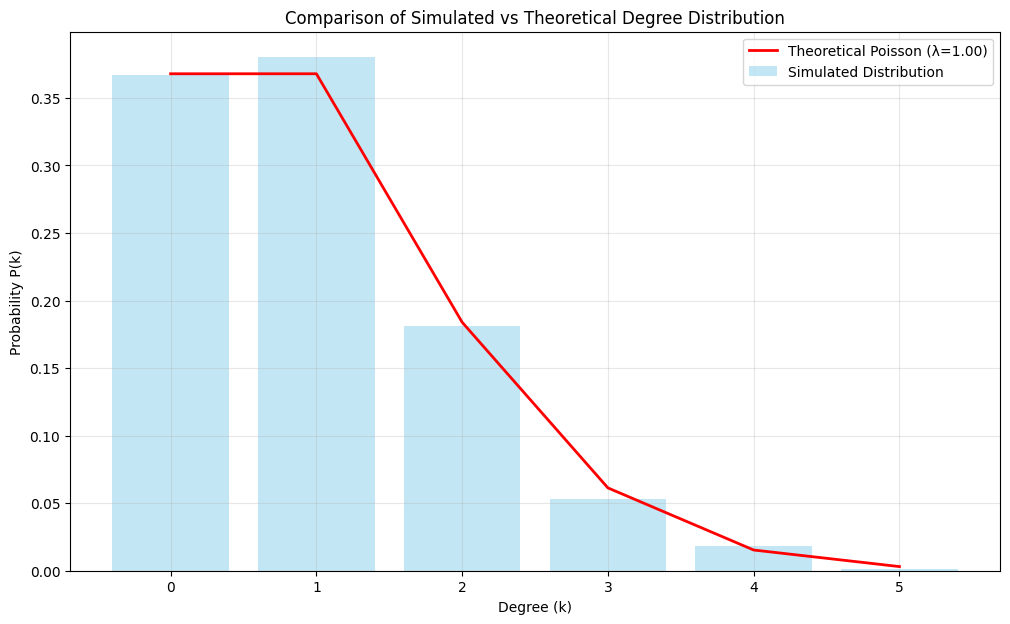

In [6]:
# Get the degree sequence and calculate empirical probabilities
degrees = [d for n, d in G.degree()]
unique_degrees, degree_counts = np.unique(degrees, return_counts=True)
empirical_probs = degree_counts / len(degrees)

# Calculate theoretical Poisson probabilities
lambda_theoretical = N * p  # theoretical mean = Np
k_range = np.arange(0, max(degrees) + 1)
poisson_probs = np.exp(-lambda_theoretical) * (lambda_theoretical ** k_range) / \
                np.array([np.math.factorial(k) for k in k_range])

# Create the comparison plot
plt.figure(figsize=(12, 7))
plt.bar(unique_degrees, empirical_probs, alpha=0.5, color='skyblue', 
        label='Simulated Distribution')
plt.plot(k_range, poisson_probs, 'r-', linewidth=2, 
         label=f'Theoretical Poisson (λ={lambda_theoretical:.2f})')

plt.xlabel('Degree (k)')
plt.ylabel('Probability P(k)')
plt.title('Comparison of Simulated vs Theoretical Degree Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

from scipy.stats import chi2_contingency, chi2

# Get observed frequencies
observed = degree_counts

# Calculate expected frequencies based on Binomial distribution (instead of Poisson)
k_values = unique_degrees
expected_probs = scipy.stats.binom.pmf(k_values, n, p)
expected = expected_probs * len(degrees)  # Convert to frequencies

# Remove any bins where expected frequency is too small (< 5)
mask = expected >= 5
observed = observed[mask]
expected = expected[mask]

# Perform chi-square test
chi_stat = np.sum((observed - expected) ** 2 / expected)
df = len(observed) - 1  # degrees of freedom
p_value = 1 - chi2.cdf(chi_stat, df)

print("\nChi-square test results:")
print(f"Chi-square statistic: {chi_stat:.4f}")
print(f"Degrees of freedom: {df}")
print(f"p-value: {p_value:.4f}")
print("\nInterpretation:")
print("H0: The degree distribution follows a Poisson distribution")
print("H1: The degree distribution does not follow a Poisson distribution")
print(f"{'Reject' if p_value < 0.05 else 'Fail to reject'} H0 at 5% significance level")

plt.show()

### Exercise 8

Check dependence of the results of the previous excercise for various values of p and N.

### Solution

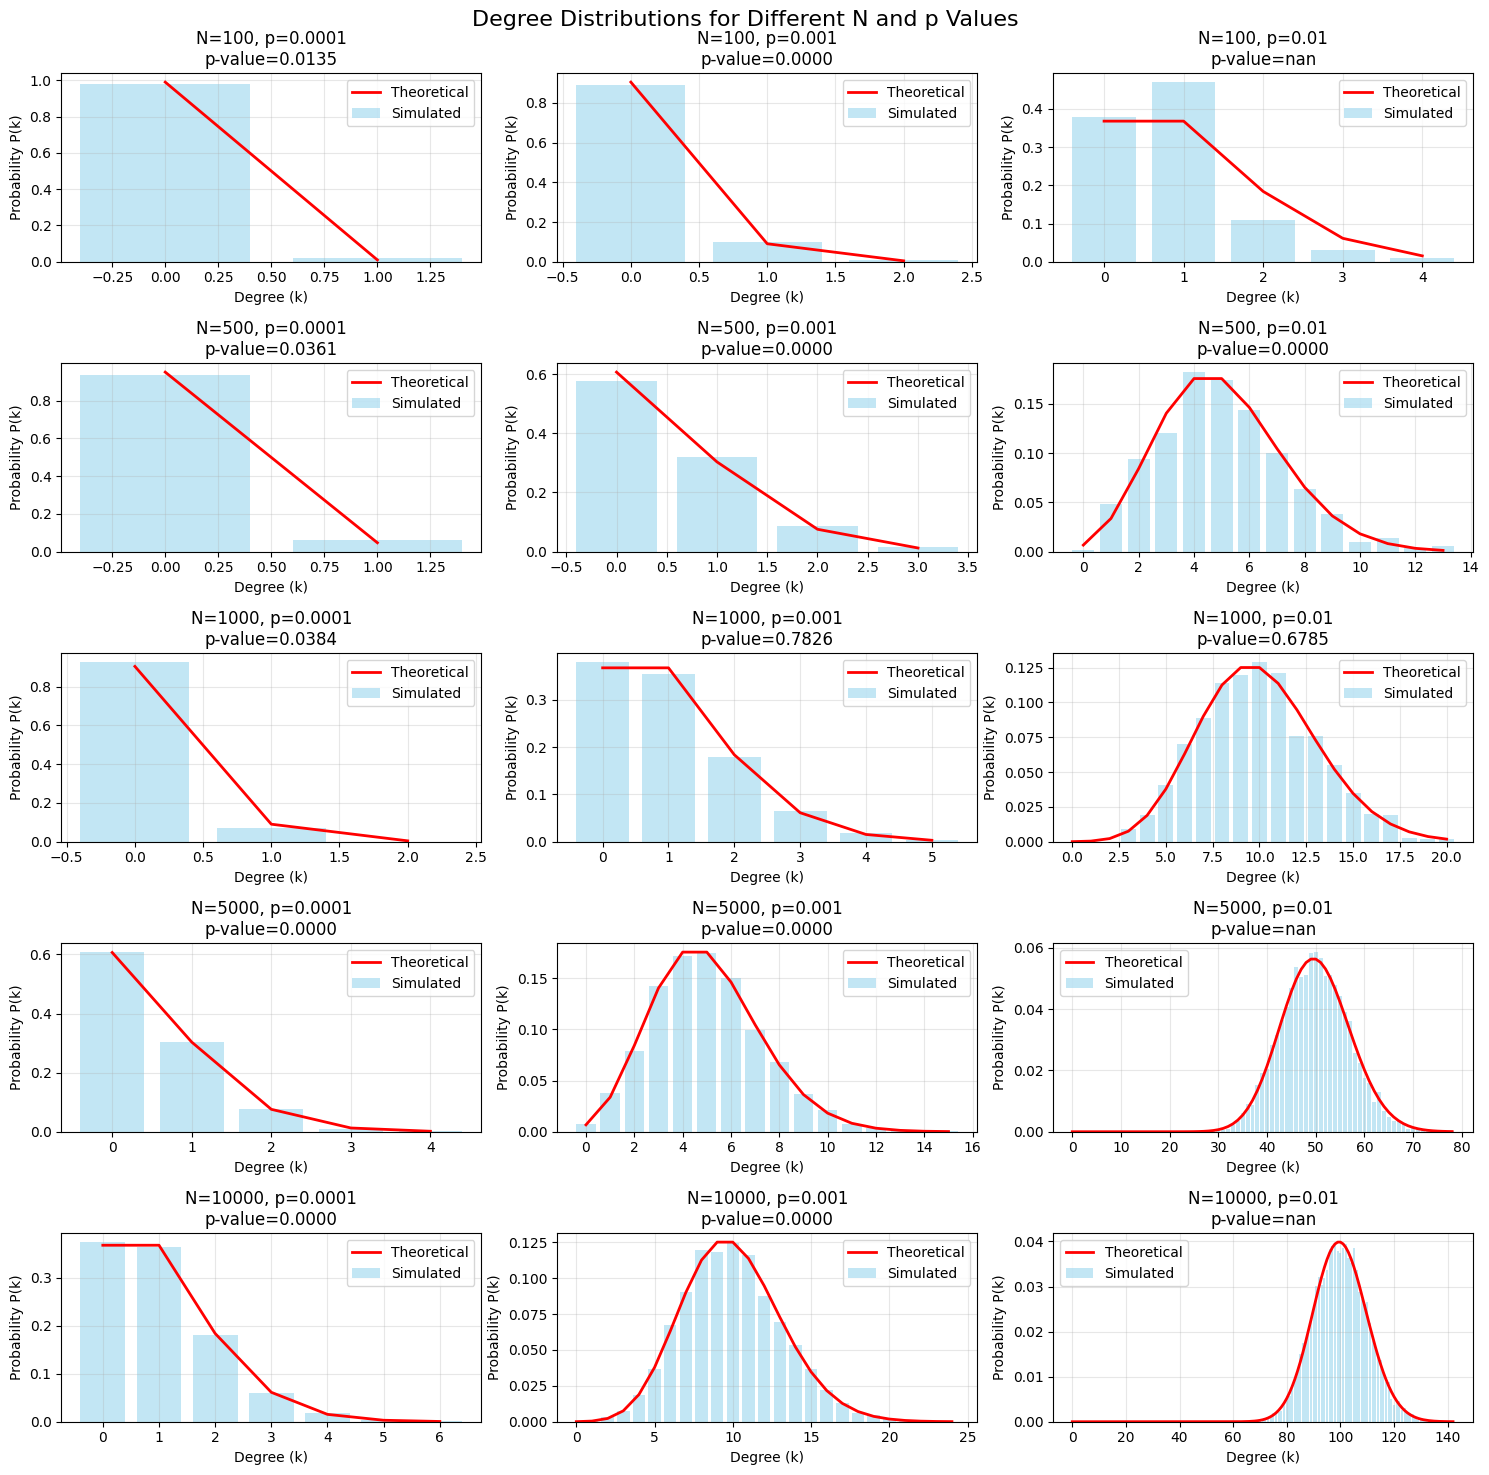

In [7]:
# Define different values of N and p to test
N_values = [100, 500, 1000, 5000, 10000]
p_values = [0.0001, 0.001, 0.01]

# Create subplots grid
fig, axes = plt.subplots(len(N_values), len(p_values), figsize=(15, 15))
fig.suptitle('Degree Distributions for Different N and p Values', fontsize=16)

# Test each combination
for i, N in enumerate(N_values):
    for j, p in enumerate(p_values):
        # Create ER graph
        G, adj_matrix = create_er_adjacency_matrix(N, p)
        
        # Get degree sequence and calculate empirical probabilities
        degrees = [d for n, d in G.degree()]
        unique_degrees, degree_counts = np.unique(degrees, return_counts=True)
        empirical_probs = degree_counts / len(degrees)
        
        # Calculate theoretical Poisson probabilities
        lambda_theoretical = N * p
        k_range = np.arange(0, max(degrees) + 1)
        poisson_probs = np.exp(-lambda_theoretical) * (lambda_theoretical ** k_range) / \
                        np.array([np.math.factorial(k) for k in k_range])
                        
        # Calculate expected frequencies based on Binomial distribution (instead of Poisson)
        k_values = unique_degrees
        expected_probs = scipy.stats.binom.pmf(k_values, n, p)
        expected = expected_probs * len(degrees)  # Convert to frequencies

        # Calculate chi-square test
        mask = expected >= 5
        if sum(mask) > 1:  # Ensure we have at least 2 bins for chi-square test
            observed = degree_counts[mask]
            expected = expected[mask]
            chi_stat = np.sum((observed - expected) ** 2 / expected)
            df = len(observed) - 1
            p_value = 1 - chi2.cdf(chi_stat, df)
        else:
            chi_stat, p_value = np.nan, np.nan
        
        # Plot
        ax = axes[i, j]
        ax.bar(unique_degrees, empirical_probs, alpha=0.5, color='skyblue', 
               label='Simulated')
        ax.plot(k_range, poisson_probs, 'r-', linewidth=2, 
                label='Theoretical')
        ax.set_title(f'N={N}, p={p}\np-value={p_value:.4f}')
        ax.set_xlabel('Degree (k)')
        ax.set_ylabel('Probability P(k)')
        ax.grid(True, alpha=0.3)
        ax.legend()

plt.tight_layout()
plt.show()

### problem 1

Compute:

- mean of a random variable from a Poisson distribution
- mean of a random variable from a squared Poisson distribution
- variance of a random variable from a Poisson distribution

### Solution

Let $X$ be a random variable following a Poisson distribution with parameter $\lambda$. The probability mass function is:

$$P(X = k) = \frac{e^{-\lambda}\lambda^k}{k!}$$

1. **Mean of Poisson Distribution ($E[X]$)**

$$E[X] = \sum_{k=0}^{\infty} k \cdot P(X = k)$$
$$= \sum_{k=0}^{\infty} k \cdot \frac{e^{-\lambda}\lambda^k}{k!}$$
$$= \lambda e^{-\lambda} \sum_{k=1}^{\infty} \frac{\lambda^{k-1}}{(k-1)!}$$
$$= \lambda e^{-\lambda} \cdot e^{\lambda}$$
$$= \lambda$$

2. **Mean of Squared Poisson Distribution ($E[X^2]$)**

$$E[X^2] = \sum_{k=0}^{\infty} k^2 \cdot P(X = k)$$
$$= \sum_{k=0}^{\infty} k^2 \cdot \frac{e^{-\lambda}\lambda^k}{k!}$$
$$= \lambda e^{-\lambda} \sum_{k=1}^{\infty} k \cdot \frac{\lambda^{k-1}}{(k-1)!}$$
$$= \lambda e^{-\lambda} (\lambda e^{\lambda} + \lambda e^{\lambda})$$
$$= \lambda^2 + \lambda$$

3. **Variance of Poisson Distribution ($Var[X]$)**

$$Var[X] = E[X^2] - (E[X])^2$$
$$= (\lambda^2 + \lambda) - \lambda^2$$
$$= \lambda$$

Therefore:
- $E[X] = \lambda$
- $E[X^2] = \lambda^2 + \lambda$
- $Var[X] = \lambda$

### Problem 2

Prove that $ <C> = p $.

### Solution

Let's prove that the average clustering coefficient $<C>$ equals the probability $p$ in an Erdős-Rényi random graph.

Let's recall that for a node $i$, its clustering coefficient $C_i$ is defined as:

$$C_i = \frac{\text{number of triangles connected to node i}}{\text{number of possible triangles connected to node i}}$$

For a node $i$ with degree $k_i$, the number of possible triangles is:

$$\binom{k_i}{2} = \frac{k_i(k_i-1)}{2}$$

In an ER random graph:
- Each edge exists independently with probability $p$
- For any two neighbors of node $i$, the probability of them being connected is also $p$
- This is because edge existence is independent in ER graphs

Therefore, for any node $i$:

$$C_i = p$$

Because each possible triangle has probability $p$ of being completed, regardless of other edges.

The average clustering coefficient $<C>$ is:

$$<C> = \frac{1}{N}\sum_{i=1}^N C_i = \frac{1}{N}\sum_{i=1}^N p = p$$

Thus, we have proven that in an ER random graph, $<C> = p$.

This is a key property of ER graphs and shows that the clustering is purely random, unlike many real-world networks which tend to have higher clustering coefficients.

### Problem 3

Generate and draw a graph consisting of 4 community each with $N=20$ nodes and the probability of connection within the community higher than between them. Draw the result. How it depends on the parameter values? 

### Solution


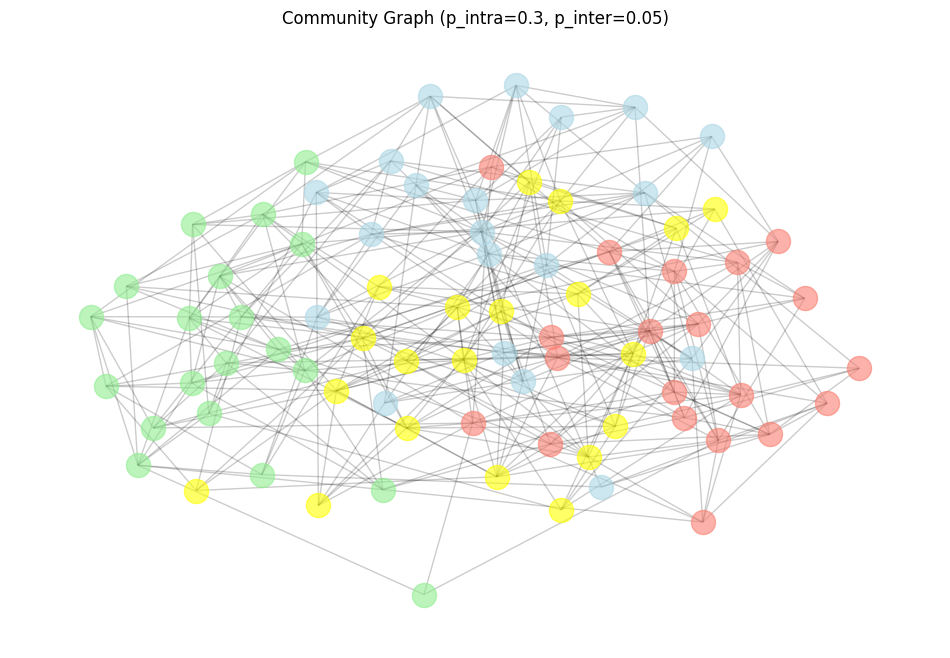

Number of nodes: 80
Number of edges: 346
Average clustering coefficient: 0.151
Modularity: 0.367




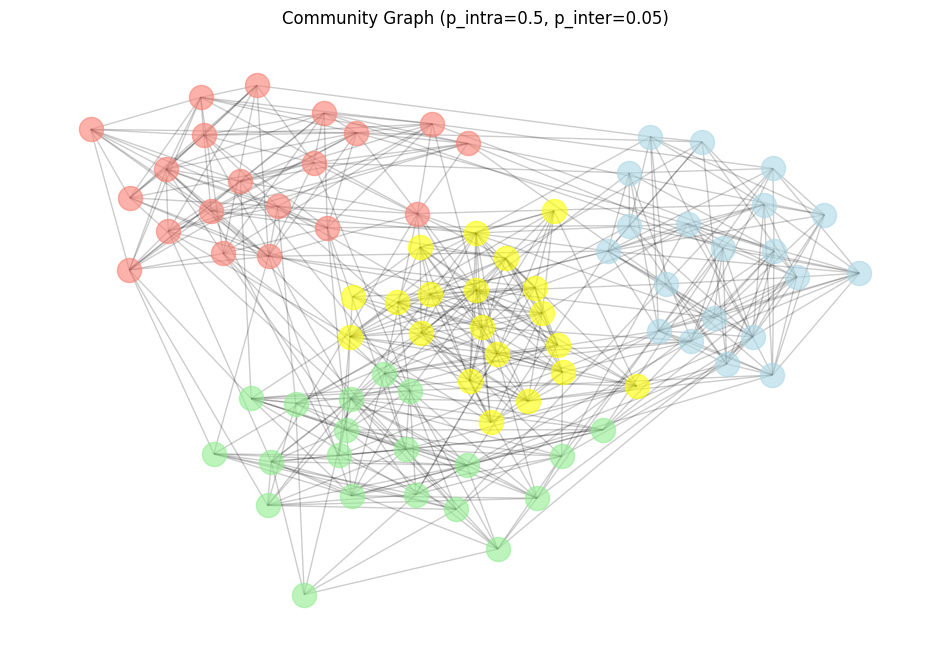

Number of nodes: 80
Number of edges: 497
Average clustering coefficient: 0.338
Modularity: 0.524




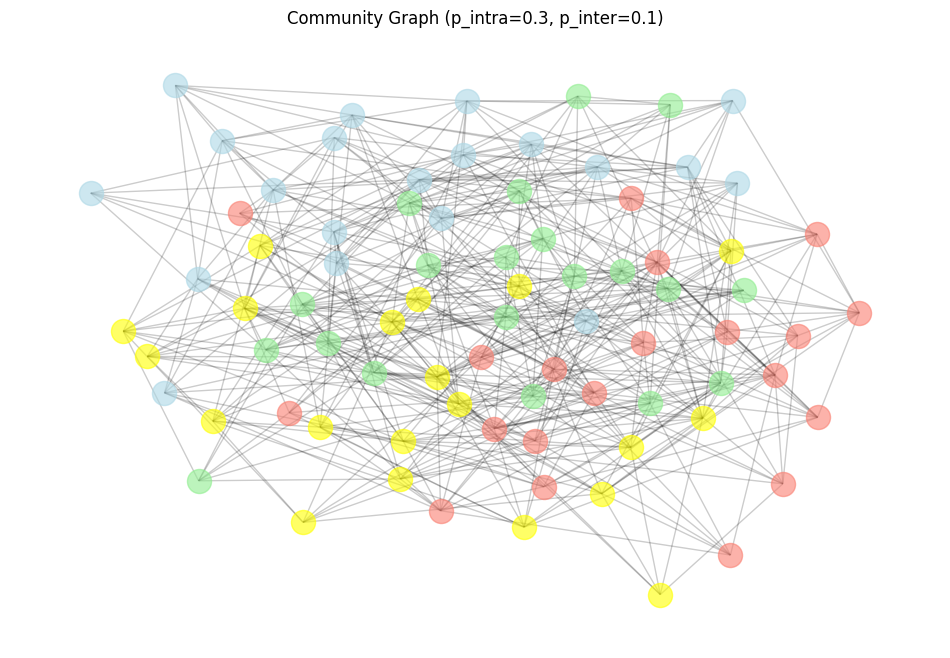

Number of nodes: 80
Number of edges: 469
Average clustering coefficient: 0.182
Modularity: 0.223




In [35]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def create_community_graph(n_communities=4, nodes_per_community=20, 
                         p_intra=0.3, p_inter=0.05):
    """
    Creates a graph with multiple communities
    
    Parameters:
    n_communities (int): Number of communities
    nodes_per_community (int): Number of nodes in each community
    p_intra (float): Probability of connection within communities
    p_inter (float): Probability of connection between communities
    
    Returns:
    G (networkx.Graph): Generated graph
    communities (list): List of node sets for each community
    """
    # Initialize empty graph
    G = nx.Graph()
    
    # Create nodes with community labels
    communities = []
    for i in range(n_communities):
        community = set(range(i*nodes_per_community, (i+1)*nodes_per_community))
        communities.append(community)
        G.add_nodes_from(community)
    
    # Add edges within communities (higher probability)
    for comm in communities:
        for u in comm:
            for v in comm:
                if u < v and np.random.random() < p_intra:
                    G.add_edge(u, v)
    
    # Add edges between communities (lower probability)
    for i, comm1 in enumerate(communities):
        for j, comm2 in enumerate(communities):
            if i < j:
                for u in comm1:
                    for v in comm2:
                        if np.random.random() < p_inter:
                            G.add_edge(u, v)
    
    return G, communities

def plot_community_graph(G, communities, title):
    """
    Plots the graph with communities in different colors
    """
    plt.figure(figsize=(12, 8))
    
    # Use spring layout with adjusted k parameter
    pos = nx.spring_layout(G, k=1/np.sqrt(len(G.nodes())), iterations=50)
    
    # Colors for different communities
    colors = ['lightblue', 'lightgreen', 'salmon', 'yellow']
    
    # Draw nodes for each community with different colors
    for idx, community in enumerate(communities):
        nx.draw_networkx_nodes(G, pos, 
                             nodelist=list(community),
                             node_color=colors[idx],
                             node_size=300,
                             alpha=0.6)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.2)
    
    plt.title(title)
    plt.axis('off')
    plt.show()
    
    # Print some statistics
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Average clustering coefficient: {nx.average_clustering(G):.3f}")
    
    # Calculate modularity
    communities_dict = {node: idx for idx, comm in enumerate(communities) for node in comm}
    modularity = nx.community.modularity(G, communities)
    print(f"Modularity: {modularity:.3f}")

# Test different parameter values
parameter_sets = [
    {'p_intra': 0.3, 'p_inter': 0.05},
    {'p_intra': 0.5, 'p_inter': 0.05},
    {'p_intra': 0.3, 'p_inter': 0.1},
]

for params in parameter_sets:
    G, communities = create_community_graph(p_intra=params['p_intra'], 
                                         p_inter=params['p_inter'])
    title = f"Community Graph (p_intra={params['p_intra']}, p_inter={params['p_inter']})"
    plot_community_graph(G, communities, title)
    print("\n" + "="*50 + "\n")

### Problem 4

Draw a graph of the averaged coefficient of clustering of the WS network against its parameter p.

### Solution


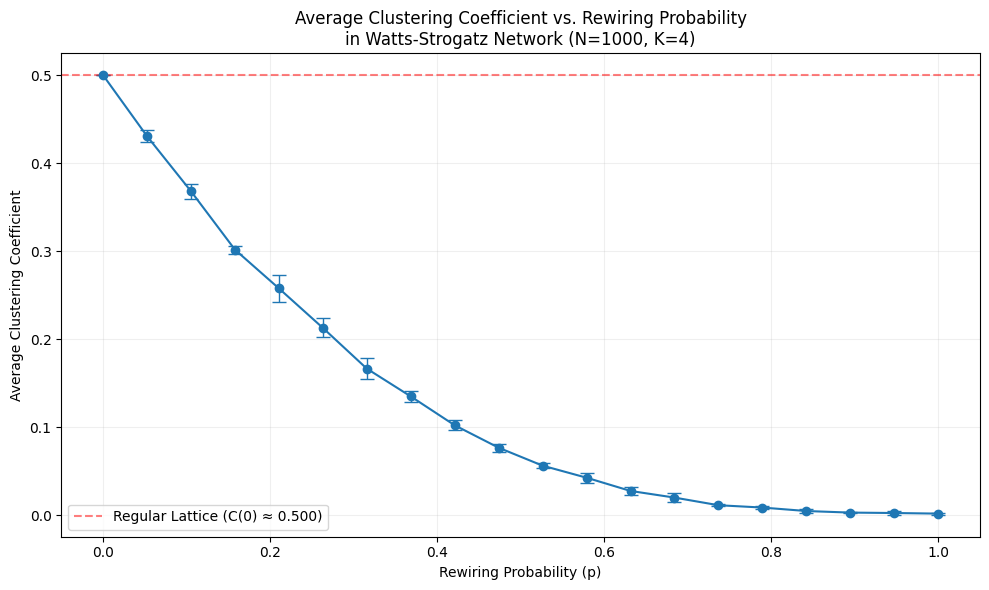

Regular lattice clustering (p=0): 0.500
Random network clustering (p=1): 0.002
Small-world clustering (p=0.01): 0.500


In [40]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def calculate_avg_clustering(N=1000, K=4, p_values=None, num_iterations=5):
    """
    Calculate average clustering coefficient for WS networks with different p values
    
    Parameters:
    N (int): Number of nodes
    K (int): Each node is connected to K nearest neighbors
    p_values (array): Array of rewiring probabilities
    num_iterations (int): Number of networks to generate for each p value
    """
    if p_values is None:
        # Create linearly spaced p values between 0 and 1
        p_values = np.linspace(0, 1, 20)
    
    avg_clustering = []
    std_clustering = []
    
    for p in p_values:
        # Generate multiple networks for each p value
        clusterings = []
        for _ in range(num_iterations):
            G = nx.watts_strogatz_graph(n=N, k=K, p=p)
            clusterings.append(nx.average_clustering(G))
        
        avg_clustering.append(np.mean(clusterings))
        std_clustering.append(np.std(clusterings))
    
    return np.array(avg_clustering), np.array(std_clustering)

# Set parameters
N = 1000  # number of nodes
K = 4     # number of nearest neighbors
p_values = np.linspace(0, 1, 20)  # linear spacing of rewiring probabilities

# Calculate clustering coefficients
avg_clustering, std_clustering = calculate_avg_clustering(N, K, p_values)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot average clustering coefficient with error bars
plt.errorbar(p_values, avg_clustering, yerr=std_clustering, 
            fmt='o-', capsize=5, capthick=1, elinewidth=1)

# Add labels and title
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Clustering Coefficient')
plt.title('Average Clustering Coefficient vs. Rewiring Probability\n'
          f'in Watts-Strogatz Network (N={N}, K={K})')

# Add grid
plt.grid(True, alpha=0.2)

# Calculate theoretical clustering for regular lattice (p=0)
C_0 = 3 * (K - 2)/(4 * (K - 1))
plt.axhline(y=C_0, color='r', linestyle='--', alpha=0.5, 
            label=f'Regular Lattice (C(0) ≈ {C_0:.3f})')

plt.legend()
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Regular lattice clustering (p=0): {C_0:.3f}")
print(f"Random network clustering (p=1): {avg_clustering[-1]:.3f}")
print(f"Small-world clustering (p=0.01): {avg_clustering[np.abs(p_values - 0.01).argmin()]:.3f}")

### Problem 5

With (or without) Mathematica solve ER model in the case of $G_{N,E}$.

### Solution 

1. Solve the ER (Erdős-Rényi) model for the $G_{N,E}$ case. 

The $G_{N,E}$ model is a variant of the ER random graph where:
- N is the number of nodes
- E is the fixed number of edges

All possible graphs with exactly N nodes and E edges are equally likely.

Here's the solution:

In [2]:
# number of nodes 
N = 100

# number of edges 
E = 50

# Total possible edges in a graph with N nodes
max_edges = (N * (N-1)) / 2

# Probability of an edge existing between any two vertices
p = E / max_edges 

2. Degree Distribution:

For large N, the degree distribution in G(N,E) follows a binomial distribution:

In [ ]:
from scipy.stats import binom

def degree_distribution(k, N, E):
    """
    Calculate probability of a vertex having degree k
    
    Parameters:
    k: degree
    N: number of nodes
    E: number of edges
    """
    p = (2 * E) / (N * (N-1))
    return binom.pmf(k, N-1, p)